Jonathan Sosa Uranga<br><br>
MDCgraphTest.ipynb
<br><br>
Peak Performance Data Analysis for Seasonal Performance

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
from matplotlib.patches import Rectangle

from analysis import An
from teamsAnalysis import TeamAnalysis

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

In [9]:
#create object
volley = An('data/VVC.csv',2021,fall='08/26',winter='10/15',spring='2/1',summer='05/26')
volley.initialize()

/Users/jonnasosauranga/Desktop/PEAK Performance/analysis.py:217: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  self.mean = self.fData.mean()
/Users/jonnasosauranga/Desktop/PEAK Performance/analysis.py:217: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  self.mean = self.fData.mean()
/Users/jonnasosauranga/Desktop/PEAK Performance/analysis.py:218: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  self.std = self.fData.std()


one sigle graph for all fall and scatter with differnet colors

for the year round we keep the weakly MDC and the year round MDC

for the season we keep the graph above

/Users/jonnasosauranga/Desktop/PEAK Performance/analysis.py:656: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Date-2week'] = ds['Date'] - pd.to_timedelta(14, unit='d')
/Users/jonnasosauranga/Desktop/PEAK Performance/analysis.py:662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Date-week'] = ds['Date'] - pd.to_timedelta(7, unit='d')
/var/folders/6r/6kwn1zm53m107ycbq5f_9wm40000gn/T/ipykernel_38265/3916194560.py:2: RankWarning: Polyfit may be poorly conditioned
  volley.teamGraphsBySeason()
/Users/jo

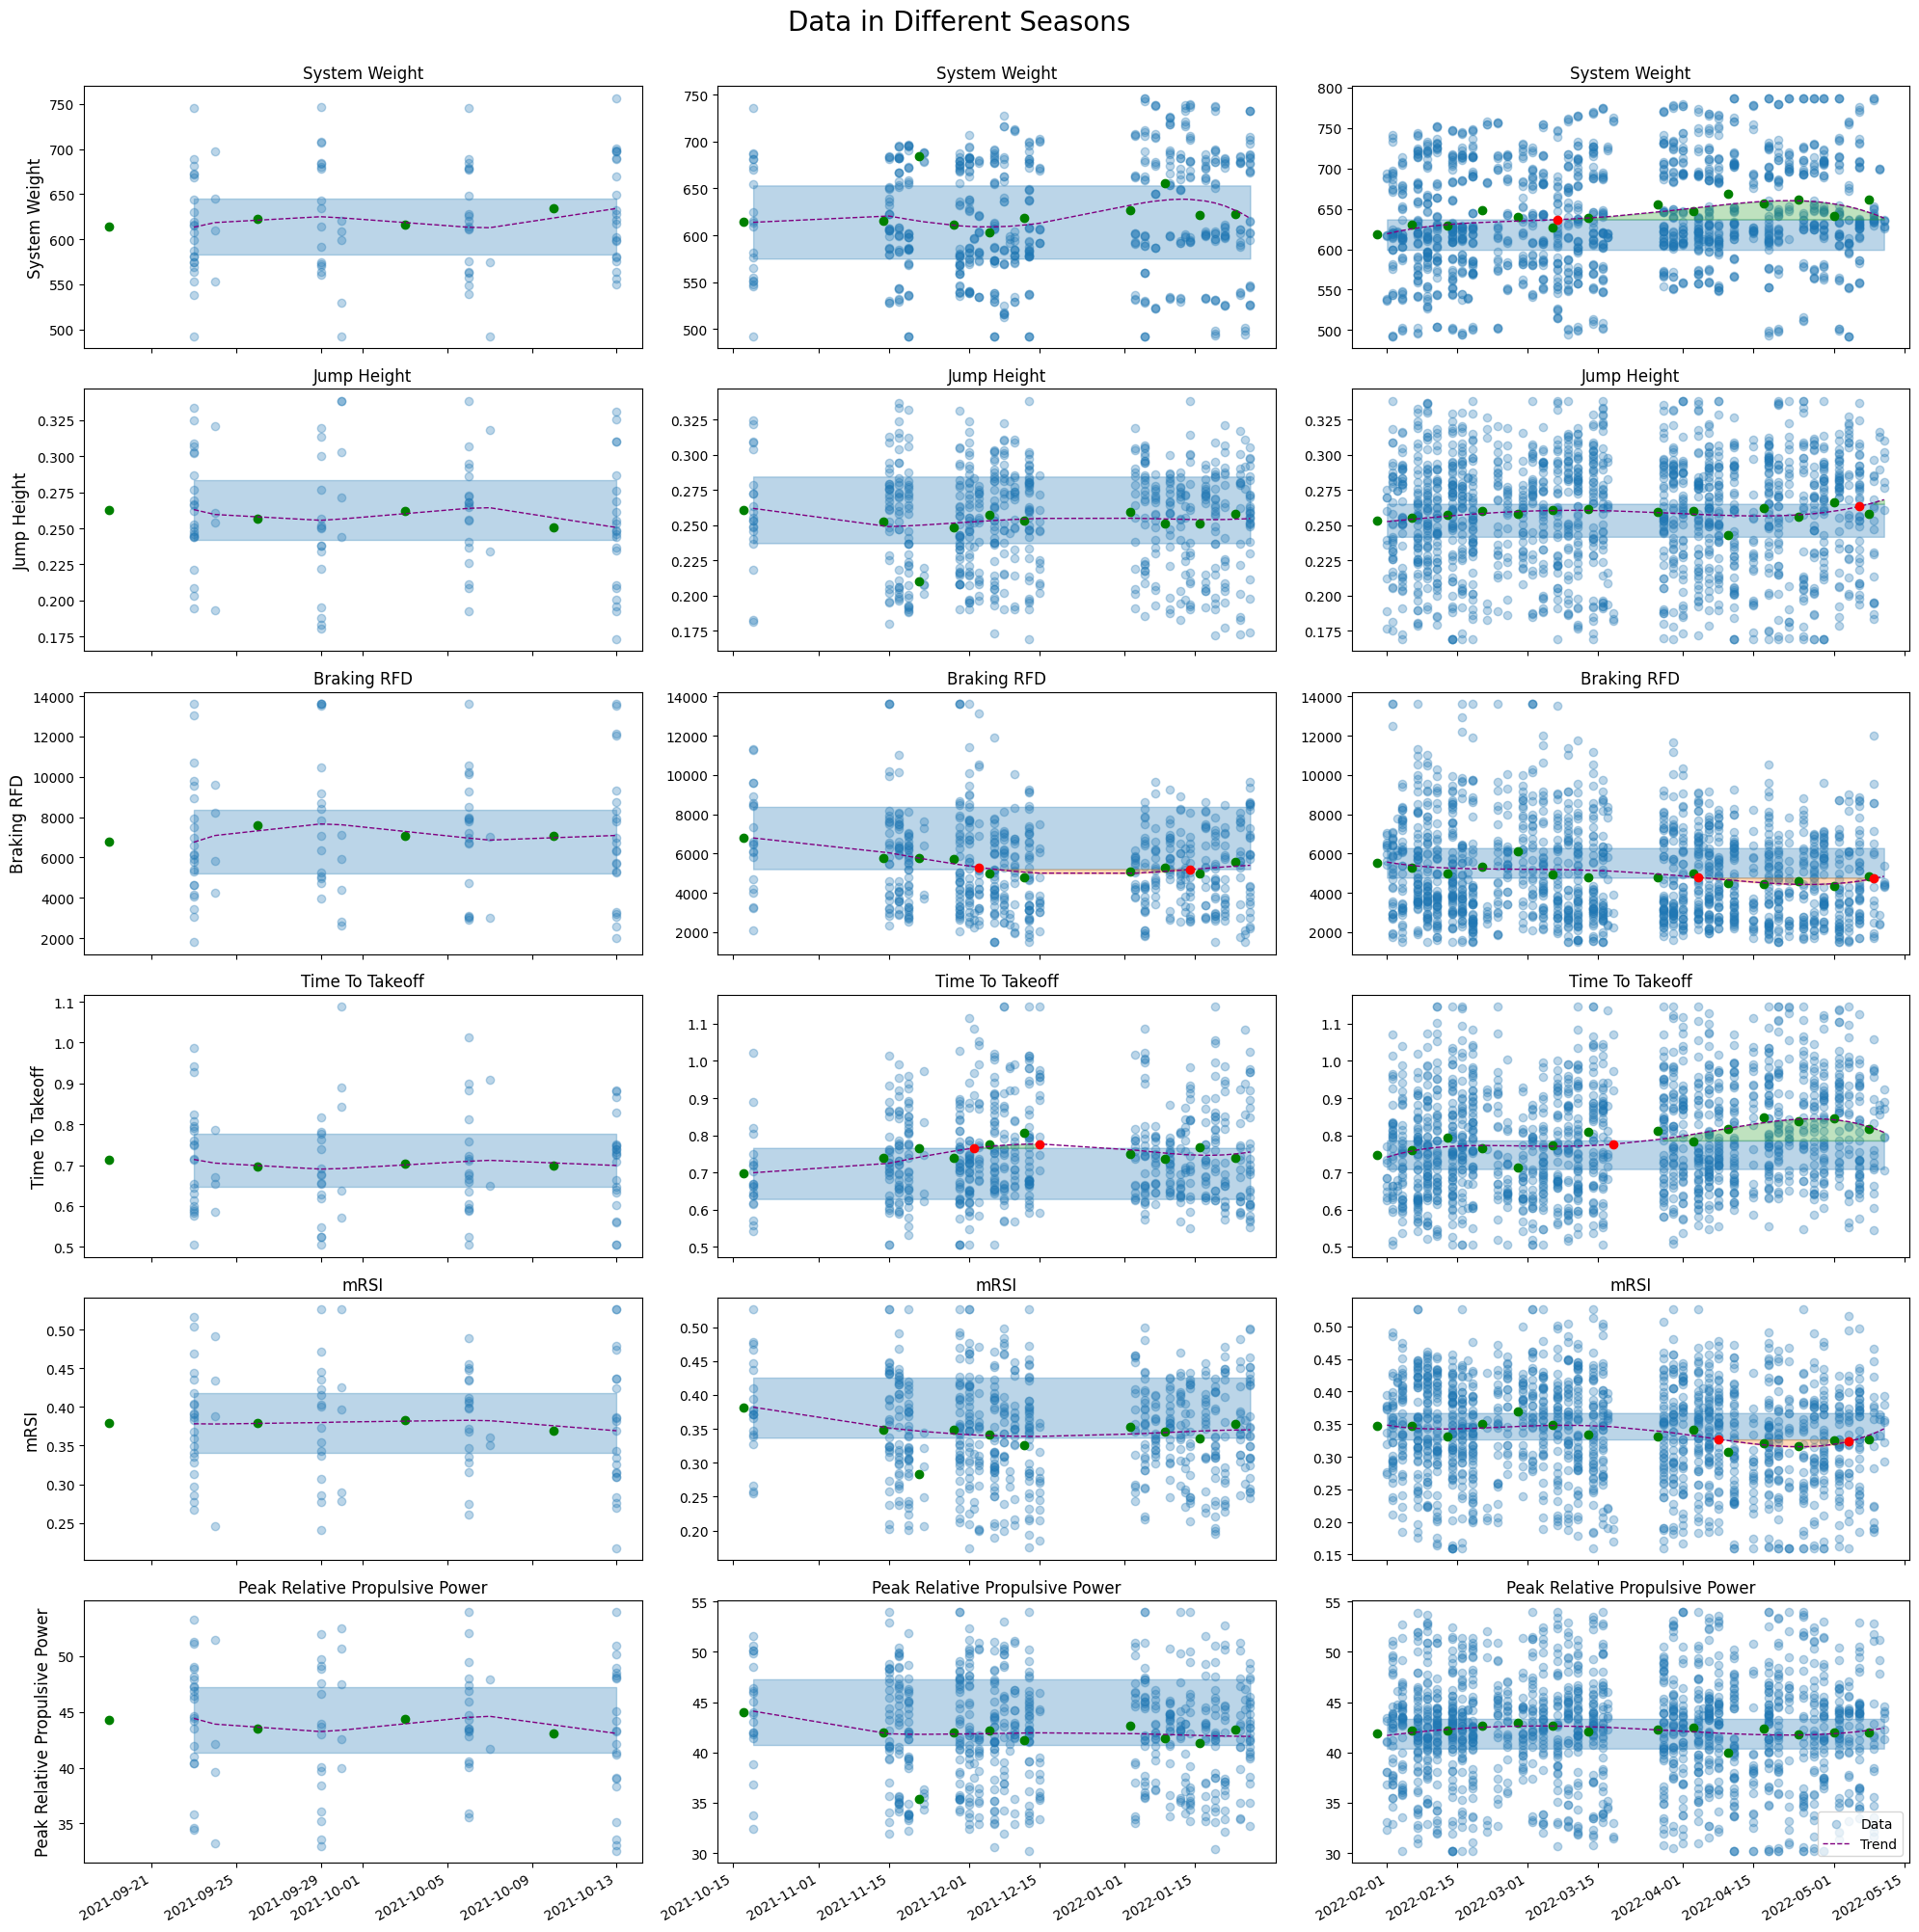

/Users/jonnasosauranga/Desktop/PEAK Performance/analysis.py:521: RankWarning: Polyfit may be poorly conditioned
  self.varGraphsMDCyear(self.fData)
/Users/jonnasosauranga/Desktop/PEAK Performance/analysis.py:494: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for wk, group in week2:
/Users/jonnasosauranga/Desktop/PEAK Performance/analysis.py:505: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for wk, group in week:
/Users/jonnasosauranga/Desktop/PEAK Performance/analysis.py:521: RankWarning: Polyfit may be poorly conditioned
  self.varGraphsMDCyear(self.fData)
/Users/jonnasosauranga/Desktop/PEAK Performance/analysis.py:494: FutureWarning: In a 

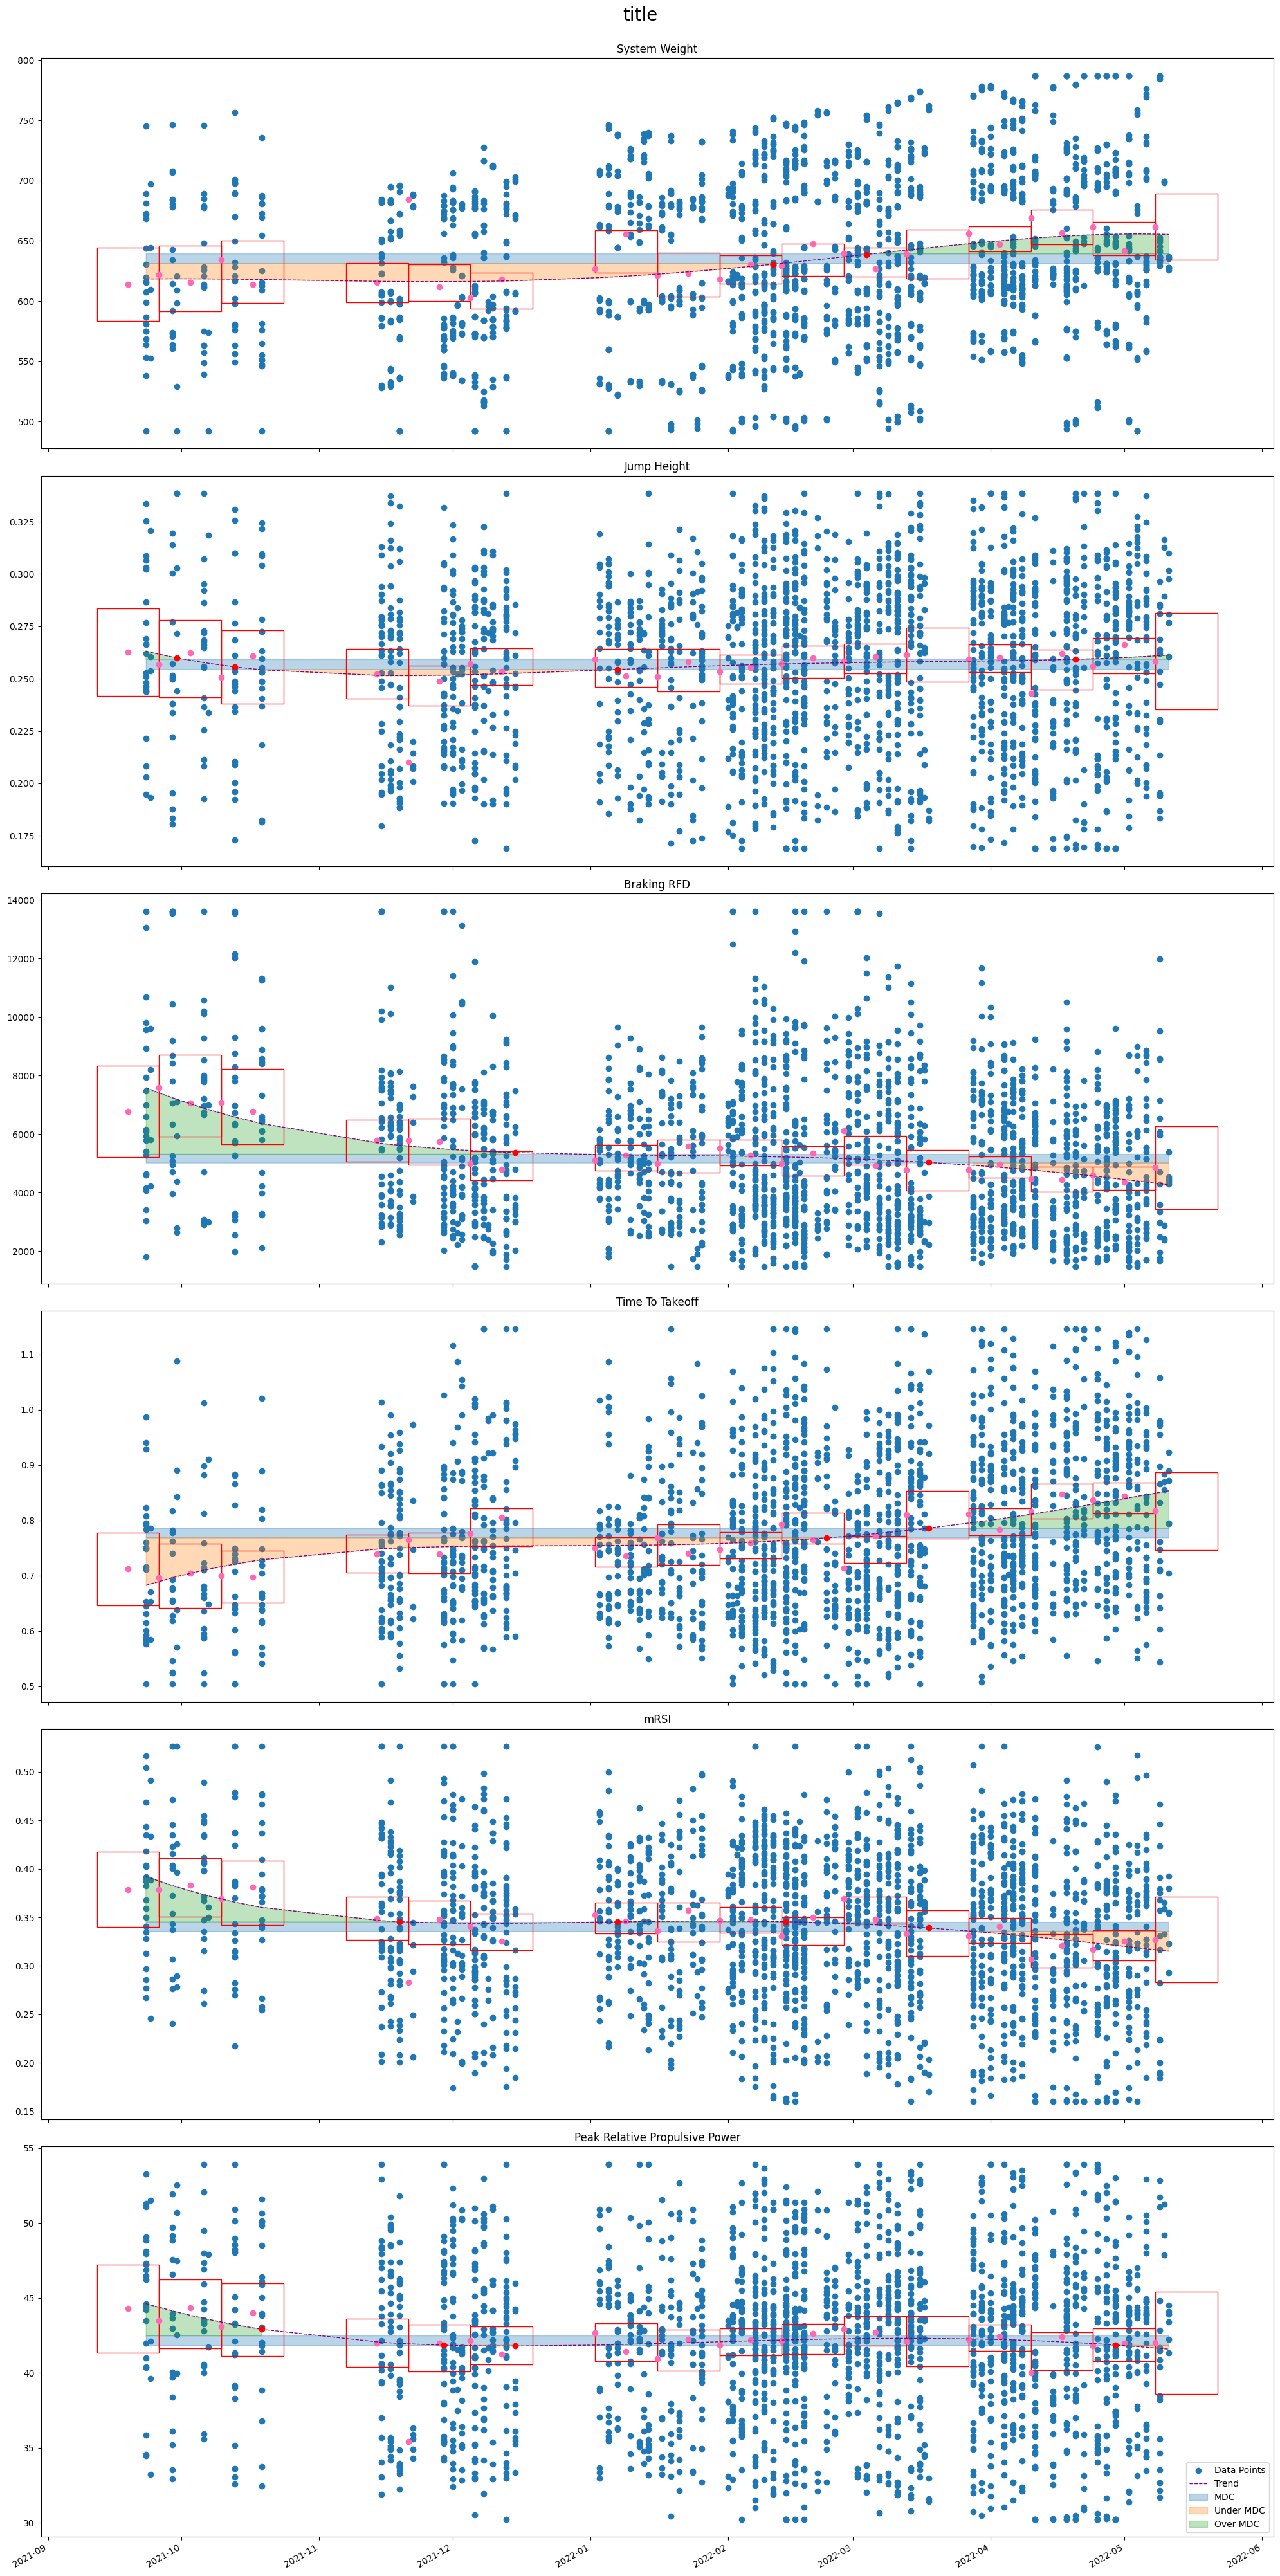

In [19]:
# test the if we can preview if we can see year long grapghs and seasonal graphs
volley.teamGraphsBySeason()
volley.varGraphYear()